## **1️⃣ Instalar dependencias necesarias**
En caso que Google Colab o tu entorno de trabajo no tenga **Stable Diffusion** preinstalado, es necesario instalarlo manualmente así como las librerías para aceleradoras gráficas:

In [1]:
!pip uninstall -y torch torchvision torchaudio
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade diffusers transformers xformers accelerate --quiet

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 1

In [2]:
!pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 --no-deps --quiet

In [2]:
!pip install diffusers transformers xformers accelerate --quiet

In [3]:
import xformers
print("xformers instalado correctamente")


xformers instalado correctamente


2️⃣ Habilitar GPU en Colab
Antes de ejecutar esta notebook, asegúrate de activar la GPU en Colab:

Ve a Entorno de ejecución → Cambiar tipo de entorno de ejecución.
Selecciona GPU en la opción de Acelerador por hardware.
Guarda los cambios.

In [4]:
import torch

# Verificar si Colab tiene acceso a una GPU
print(torch.cuda.is_available())  # Debe devolver True
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))  # Nombre de la GPU asignada

True
Tesla T4


3️⃣ Cargar Stable Diffusion y configurar GPU
Ahora cargamos el modelo y lo enviamos a la GPU para acelerar la inferencia.

In [5]:
from diffusers import StableDiffusionPipeline

# Cargar el modelo preentrenado
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Enviar el modelo a la GPU para mayor velocidad
pipe.to("cuda")

#Optimizar memoria para inferencia mas rapida
pipe.enable_xformers_memory_efficient_attention()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [11]:
prompt = "A glass of Stella Artois filled with golden, foamy beer rests on an elegant polished wooden table on the terrace of a rustic cabin with a panoramic view of Lake Nahuel Huapi in San Carlos de Bariloche. The reflection of the setting sun on the lake creates a warm and welcoming atmosphere. The glass subtly sparkles in the evening light, highlighting its fine crystal and the creamy foam on top. The scene conveys sophistication and pleasure, with soft lighting combining golden and orange hues of the sky with the warmth of the wood and the freshness of the water. A slightly out-of-focus mountainous background emphasizes the serenity and exclusivity of the moment."

Token indices sequence length is longer than the specified maximum sequence length for this model (139 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['crystal and the creamy foam on top . the scene conveys sophistication and pleasure , with soft lighting combining golden and orange hues of the sky with the warmth of the wood and the freshness of the water . a slightly out - of - focus mountainous background emphasizes the serenity and exclusivity of the moment .']


  0%|          | 0/50 [00:00<?, ?it/s]

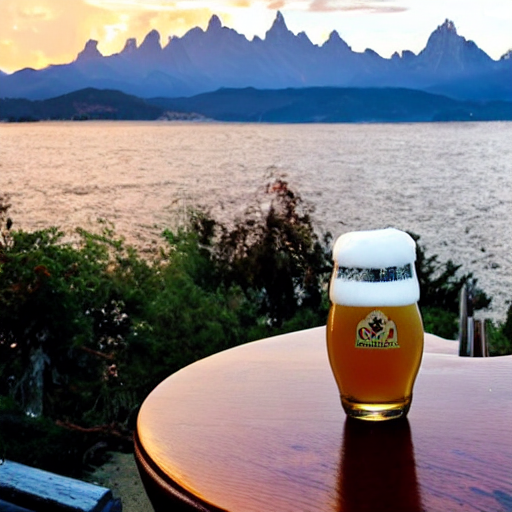

In [12]:
from IPython.display import display

# Generar imagen con Stable Diffusion
image_sd = pipe(prompt).images[0]
#image_sd.save("image_stable_diffusion.png")

# Mostrar en Colab
display(image_sd)


In [13]:
prompt2 = "Design a special label for a limited edition of Stella Artois inspired by Paris. The label must maintain the classic and elegant design of the brand, with its iconic golden frame and sophisticated typography. In the center, the Stella Artois logo highlighted in deep red and embossed gold details. The composition must include iconic elements of Paris, such as an artistic illustration of the Eiffel Tower or a scene of a Parisian café with wrought iron tables and vintage lanterns. The color palette must be warm and harmonious, with golden, beige and burgundy red tones, evoking luxury and tradition. The light must be soft and enveloping, creating a premium and refined effect. The label must convey sophistication, pleasure and exclusivity, fusing the brand's historical identity with Parisian elegance."

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["or a scene of a parisian café with wrought iron tables and vintage lanterns . the color palette must be warm and harmonious , with golden , beige and burgundy red tones , evoking luxury and tradition . the light must be soft and enveloping , creating a premium and refined effect . the label must convey sophistication , pleasure and exclusivity , fusing the brand 's historical identity with parisian elegance ."]


  0%|          | 0/50 [00:00<?, ?it/s]

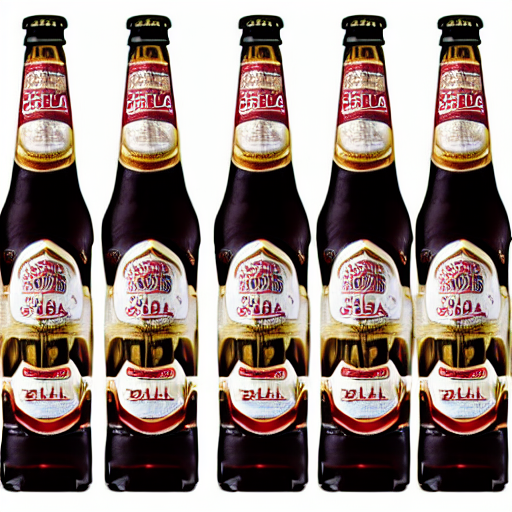

In [14]:
from IPython.display import display

# Generar imagen con Stable Diffusion
image_sd = pipe(prompt2).images[0]
#image_sd.save("image_stable_diffusion.png")

# Mostrar en Colab
display(image_sd)

In [15]:
prompt3 = "An elegant terrace on top of a New York skyscraper at dusk, set for an exclusive Stella Artois tasting event. A group of sophisticated people, dressed in elegant but relaxed clothing, enjoy glasses of golden beer with a thin layer of foam, served in the iconic Stella Artois glasses. The lighting is warm, with vintage pendant lights that create a cozy and chic atmosphere. In the background, the silhouette of the New York skyscrapers with the city lights turning on at nightfall. The scene conveys luxury, exclusivity and pleasure, with details such as dark wood tables, modern decor and a bar with Stella Artois bottles highlighting its premium design. The composition balances the elegance of the event with the vibrant energy of the city."

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['. in the background , the silhouette of the new york skyscrapers with the city lights turning on at nightfall . the scene conveys luxury , exclusivity and pleasure , with details such as dark wood tables , modern decor and a bar with stella artois bottles highlighting its premium design . the composition balances the elegance of the event with the vibrant energy of the city .']


  0%|          | 0/50 [00:00<?, ?it/s]

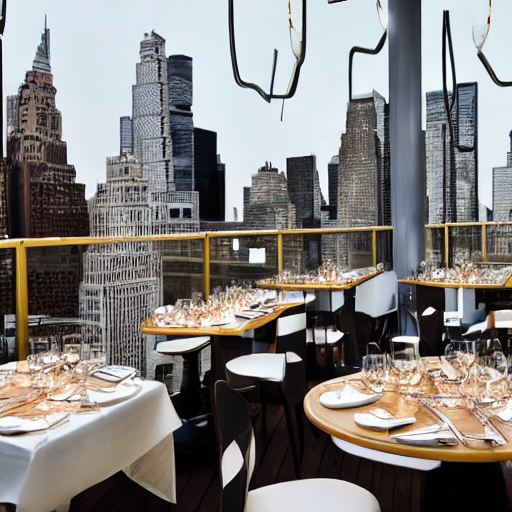

In [16]:
from IPython.display import display

# Generar imagen con Stable Diffusion
image_sd = pipe(prompt3).images[0]
#image_sd.save("image_stable_diffusion.png")

# Mostrar en Colab
display(image_sd)